In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!unzip /content/drive/MyDrive/Dataset.zip

Archive:  /content/drive/MyDrive/Dataset.zip
   creating: dataset/
  inflating: dataset/Job description.pdf  
   creating: dataset/trainResumes/
  inflating: dataset/trainResumes/candidate_000.pdf  
  inflating: dataset/trainResumes/candidate_001.pdf  
  inflating: dataset/trainResumes/candidate_002.pdf  
  inflating: dataset/trainResumes/candidate_003.pdf  
  inflating: dataset/trainResumes/candidate_006.pdf  
  inflating: dataset/trainResumes/candidate_007.pdf  
  inflating: dataset/trainResumes/candidate_008.pdf  
  inflating: dataset/trainResumes/candidate_009.pdf  
  inflating: dataset/trainResumes/candidate_010.pdf  
  inflating: dataset/trainResumes/candidate_011.pdf  
  inflating: dataset/trainResumes/candidate_012.pdf  
  inflating: dataset/trainResumes/candidate_013.pdf  
  inflating: dataset/trainResumes/candidate_015.pdf  
  inflating: dataset/trainResumes/candidate_020.pdf  
  inflating: dataset/trainResumes/candidate_021.pdf  
  inflating: dataset/trainResumes/candidate_0

In [2]:
pip install pdfplumber

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached Pillow-9.3.0-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.2 MB)
  Attempting uninstall: Pillow
    Found existing installation: Pillow 9.0.0
    Uninstalling Pillow-9.0.0:
      Successfully uninstalled Pillow-9.0.0


In [3]:
pip install fuzzywuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pdfplumber
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from fuzzywuzzy import fuzz
from sklearn.feature_extraction.text import CountVectorizer
from scipy import stats
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from tqdm import tqdm

/usr/local/lib/python3.7/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


Function to read pdf files

In [5]:
def pdf2Text(filename):
    ''' load pdf and return the text'''
    text = ''
    with pdfplumber.open(filename) as pdfObj:
        for page in pdfObj.pages:
            text += page.extract_text()
    return text

Read Job description

In [6]:
jd = pdf2Text(r"/content/dataset/Job description.pdf")
print(jd)

Machine Learning Engineering
13585ABC
Knowledge and Innovation
What you’ll do
You will focus on researching, building, and designing self-running artificial intelligence (AI)
systems to automate predictive models. You are responsible to design and create the AI
algorithms capable of learning and making predictions that define machine learning (ML).
Experience and qualifications
● Bachelor's or Master's degree (mention the course as per requirement)
● 0-2 years of work experience providing analytics solutions in a commercial setting
Technical expertise
Must have
● Machine Learning, Clustering, Logistic Regression, Classification
● Different libraries such as SciKit Learn, NumPy, Pandas, Matplotlib, Seaborn
● Deep learning frameworks such as Tensorflow, Keras, PyTorch and application of Neural
Networks and models. CNN, RNN, GANs
● Familiar with Natural Language Processing and associated libraries like NLTK, SpaCy,
Beautiful Soup
● PySpark, Hadoop, and Big Data Pipelines
● Data science me

Read Train data

In [7]:
Data = pd.read_csv(r"/content/dataset/train.csv")

Check the shape of the data

In [8]:
Data.shape

(90, 2)

Check the columns in the data

In [9]:
Data.columns

Index(['CandidateID', 'Match Percentage'], dtype='object')

In [10]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CandidateID       90 non-null     object 
 1   Match Percentage  90 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.5+ KB


In [11]:
Data.describe()

,Match Percentage
count,90.000000
mean,39.645333
std,16.032770
min,4.810000
25%,35.937500
50%,44.650000
75%,50.542500
max,69.210000



Checking Duplicate rows

In [12]:
print(Data.duplicated().sum())

0


Checking first 5 rows of the data

In [13]:
Data.head()

,CandidateID,Match Percentage
0,candidate_011,13.60
1,candidate_113,36.63
2,candidate_123,54.93
3,candidate_012,41.46
4,candidate_002,48.91


View first 5 resumes

In [14]:
for sampleResume in Data.CandidateID.head().values:
    print(pdf2Text(r'/content/dataset/trainResumes/'+sampleResume+'.pdf'))
    print('\n\n'+'*'*80+'\n\n')

L I A M   A N D R E W S
FRESHER
EXECUTIVE WORK EXPERIENCE
SUMMARY
DICTIS
Fresher with strong statistical and Intern Trainee, Jan 2020 to Apr 2020
analytic capabilities. Someone who
Responsible for performing and helping in decision
is driven by the passion for
making. 
problem solving. Though I am from
Civil Engineering background I
have always been fascinated with
data and how Machine Learning is
evolving with iit.
PERSONAL
SKILLS
Data Analyst, Data Mining, Data
Visualization, Machine Learning,
Linear Regression, Statistical
Modeling, Predictive Modeling, SQL
ACADEMIC PROFILE
Server, Oracle, Python.
PROJECTS
B.Tech(Civil) Garodia Institute of Technosciences,
Railway Signals Determiner using
2020 
relay weight system.
EXTRA-CURRICULARS
Data Preprocessing with Python
Data Visualization with Power BI


********************************************************************************


Ellie Mackey
FRESHER INTERN
Executive Profile Work Experience
Actively seeking job. An enthusiast, with a

Univariate and Bivariate analysis

In [15]:
resumeStrLen = []
resumeWordLen = []
for sampleResume in Data.CandidateID.values:
    # get character length of the resume
    resumeStrLen.append(len(pdf2Text(r'/content/dataset/trainResumes/'+sampleResume+'.pdf')))
    # get word length of the resume
    resumeWordLen.append(len(pdf2Text(r'/content/dataset/trainResumes/'+sampleResume+'.pdf').split()))

In [16]:
print('Min resume character length '+str(min(resumeStrLen)))
print('Max resume character length '+str(max(resumeStrLen)))

Min resume character length 529
Max resume character length 1543


In [17]:
pip install Pillow==9.0.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached Pillow-9.0.0-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.3 MB)
  Attempting uninstall: Pillow
    Found existing installation: Pillow 9.3.0
    Uninstalling Pillow-9.3.0:
      Successfully uninstalled Pillow-9.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pdfplumber 0.7.5 requires Pillow>=9.1, but you have pillow 9.0.0 which is incompatible.


In [18]:
from PIL import Image


Check Correlation between character length and match percentage

Spearman Rank Correlation Coefficient is 0.1970242627555634


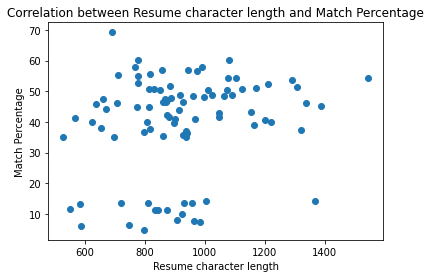

In [19]:
print('Spearman Rank Correlation Coefficient is', stats.spearmanr(resumeStrLen, Data['Match Percentage']).correlation)
plt.scatter(resumeStrLen, Data['Match Percentage'])
plt.title('Correlation between Resume character length and Match Percentage')
plt.xlabel('Resume character length')
plt.ylabel('Match Percentage')
plt.show()

Check Correlation between resume word length and match percentage

Spearman Rank Correlation Coefficient is 0.2515450511098549


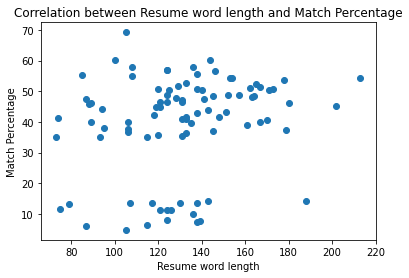

In [20]:
print('Spearman Rank Correlation Coefficient is', stats.spearmanr(resumeWordLen, Data['Match Percentage']).correlation)
plt.scatter(resumeWordLen, Data['Match Percentage'])
plt.title('Correlation between Resume word length and Match Percentage')
plt.xlabel('Resume word length')
plt.ylabel('Match Percentage')
plt.show()

Data Cleaning

In [21]:
def concat(s):
    '''Concatenate words like "D A T A  S C I E N C E" to get "DATA SCIENCE"'''
    # add spaces at both end for better processing
    s = ' '+s+' '
    while True:
        # search if more than two alphabets are separated by space
        x = re.search(r"(\s[a-zA-Z]){2,}\s", s)
        if x==None:
            break
        # replace to get the concatenation
        s = s.replace(x.group(),' '+x.group().replace(' ','')+' ')
    return s

In [22]:
def preprocess_text(x, removeStopWords=False):
    # convert to lower case
    x = str(x).lower()
    # replace unusual quotes with '
    x = x.replace("′", "'").replace("’", "'")
    # replace new line with space
    x = x.replace("\n", " ")
    # concatenate
    x = concat(x)
    # remove links
    x = re.sub(r"http\S+", "", x)
    
    # convert education degrees like B.Tech or BTech to a specified form
    x = re.sub(r"\s+b[.]?[ ]?tech[(. /]{1}", " btech bachelor of technology ", x)
    x = re.sub(r"\s+m[.]?[ ]?tech[(. ]{1}", " mtech master of technology ", x)
    x = re.sub(r"\s+b[.]?[ ]?a[(. ]{1}", " ba bachelor of arts ", x)
    x = re.sub(r"\s+m[.]?[ ]?a[(. ]{1}", " ma master of arts ", x)
    x = re.sub(r"\s+b[.]?[ ]?sc[(. ]{1}", " bsc bachelor of science ", x)
    x = re.sub(r"\s+m[.]?[ ]?sc[(. ]{1}", " msc master of science ", x)
    x = re.sub(r"\s+b[.]?[ ]?e[(. ]{1}", " beng bachelor of engineering ", x)
    x = re.sub(r"\s+m[.]?[ ]?e[(. ]{1}", " meng master of engineering ", x)
    x = re.sub(r"\s+b[.]?[ ]?c[.]?[ ]?a[(. ]{1}", " bca bachelor of computer applications ", x)
    x = re.sub(r"\s+m[.]?[ ]?c[.]?[ ]?a[(. ]{1}", " mca master of computer applications ", x)
    x = re.sub(r"\s+b[.]?[ ]?b[.]?[ ]?a[(. ]{1}", " bba bachelor of business administration ", x)
    x = re.sub(r"\s+m[.]?[ ]?b[.]?[ ]?a[(. ]{1}", " mba master of business administration ", x)
    
    # convert skills with special symbols to words
    x = x.replace("c++", "cplusplus")
    x = x.replace("c#", "csharp")
    x = x.replace(".net", "dotnet")
    
    # replace non alpha numeric character with space
    x = re.sub('\W', ' ', x)
    
    # if remove stop words flag set then remove them
    z = []
    for i in x.split():
        if not (removeStopWords and i in stopwords.words('english')):
            # use lemmatizer to reduce the inflections
            lemmatizer = WordNetLemmatizer()
            i = lemmatizer.lemmatize(i)
            z.append(i)
    z = ' '.join(z)
    
    # strip white spaces
    z = z.strip()
    return z

In [23]:
# preprocess job description
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
jd_processed = preprocess_text(jd, removeStopWords=True)
print(jd_processed)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


machine learning engineering 13585abc knowledge innovation focus researching building designing self running artificial intelligence ai system automate predictive model responsible design create ai algorithm capable learning making prediction define machine learning ml experience qualification bachelor master degree mention course per requirement 0 2 year work experience providing analytics solution commercial setting technical expertise must machine learning clustering logistic regression classification different library scikit learn numpy panda matplotlib seaborn deep learning framework tensorflow kera pytorch application neural network model cnn rnn gans familiar natural language processing associated library like nltk spacy beautiful soup pyspark hadoop big data pipeline data science methodology exploratory data analysis feature engineering model selection deployment model scale model evaluation deploying nlp architecture computer vision model production considered plus transformer

In [24]:
# preprocess all resumes
resumes = []
for candidateID in Data.CandidateID.values:
    # load resume pdf
    resume = pdf2Text(r'/content/dataset/trainResumes/'+candidateID+'.pdf')
    # preprocess
    resume_processed = preprocess_text(resume, removeStopWords=True)
    resumes.append(resume_processed)

Print the resumes after Pre-processing

In [25]:
for i in range(5):
    print(resumes[i])
    print('\n\n'+'*'*80+'\n\n')

liam andrew fresher executive work experience summary dictis fresher strong statistical intern trainee jan 2020 apr 2020 analytic capability someone responsible performing helping decision driven passion making problem solving though civil engineering background always fascinated data machine learning evolving iit personal skill data analyst data mining data visualization machine learning linear regression statistical modeling predictive modeling sql academic profile server oracle python project btech bachelor technology civil garodia institute technosciences railway signal determiner using 2020 relay weight system extra curriculars data preprocessing python data visualization power bi


********************************************************************************


ellie mackey fresher intern executive profile work experience actively seeking job enthusiast bb house developer master degree electronics intern trainee nov 2019 feb 2020 telecommunication keen learn eagerly looking opp

Feature Extraction

In [26]:
# creating structured data frame
data = pd.DataFrame({'job_description': [jd_processed]*len(Data), 'processed_resume': resumes, 'match_percentage': Data['Match Percentage']})

In [27]:
data.head()

,job_description,processed_resume,match_percentage
0,machine learning engineering 13585abc knowledg...,liam andrew fresher executive work experience ...,13.60
1,machine learning engineering 13585abc knowledg...,ellie mackey fresher intern executive profile ...,36.63
2,machine learning engineering 13585abc knowledg...,felix winston fresher fresher knowledge machin...,54.93
3,machine learning engineering 13585abc knowledg...,jimmy gartner da ta manager professional profi...,41.46
4,machine learning engineering 13585abc knowledg...,mason quadrado associate analyst certified dat...,48.91


In [28]:
# list of reputed colleges in India
reputed_colleges = ['bits', 'iit', 'bhu', 'nit', 'vit', 'anna', 'jadavpur', 'tiet', 'thapar', 'iisc', 'srm', 'dtu', 'iiit']



# check if is from reputed college
def is_from_reputed_college(x):
    x = x.split()
    for i in reputed_colleges:
        if i in x:
            return 1
    return 0

In [29]:
def feature_extract(data):
    '''extract features'''
    # number of words in resume
    data['resume_word_num'] = data.processed_resume.apply(lambda x: len(x.split()))
    # number of unique words in job description and resumes
    data['total_unique_word_num'] = data.apply(lambda x: len(set(x.job_description.split()).union(set(x.processed_resume.split()))) ,axis=1)
    # number of common words in job description and resumes
    data['common_word_num'] = data.apply(lambda x: len(set(x.job_description.split()).intersection(set(x.processed_resume.split()))) ,axis=1)
    # number of common words divided by total number of unique words combined in both job description and resumes
    data['common_word_ratio'] = data['common_word_num'] / data.apply(lambda x: len(set(x.job_description.split()).union(set(x.processed_resume.split()))) ,axis=1)
    # number of common words divided by minimum number of unique words between job description and resumes
    data['common_word_ratio_min'] = data['common_word_num'] / data.apply(lambda x: min(len(set(x.job_description.split())), len(set(x.processed_resume.split()))) ,axis=1)
    # number of common words divided by maximum number of unique words between job description and resumes
    data['common_word_ratio_max'] = data['common_word_num'] / data.apply(lambda x: max(len(set(x.job_description.split())), len(set(x.processed_resume.split()))) ,axis=1)
    
    # Fuzz WRatio
    data["fuzz_ratio"] = data.apply(lambda x: fuzz.WRatio(x.job_description, x.processed_resume), axis=1)
    # Fuzz partial ratio
    data["fuzz_partial_ratio"] = data.apply(lambda x: fuzz.partial_ratio(x.job_description, x.processed_resume), axis=1)
    # Fuzz token set ratio
    data["fuzz_token_set_ratio"] = data.apply(lambda x: fuzz.token_set_ratio(x.job_description, x.processed_resume), axis=1)
    # Fuzz token sort ratio
    data["fuzz_token_sort_ratio"] = data.apply(lambda x: fuzz.token_sort_ratio(x.job_description, x.processed_resume), axis=1)
    
    # is fresher
    data['is_fresher'] = data.processed_resume.apply(lambda x: int('fresher' in x.split()))
    # from reputed college
    data['from_reputed_college'] = data.processed_resume.apply(lambda x: is_from_reputed_college(x))
    
    # fill na fields with 0
    data.fillna(0, inplace=True)
    return data

In [30]:
# get features
data_feature = feature_extract(data)

In [31]:
data_feature.head()

,job_description,processed_resume,match_percentage,resume_word_num,total_unique_word_num,common_word_num,common_word_ratio,common_word_ratio_min,common_word_ratio_max,fuzz_ratio,fuzz_partial_ratio,fuzz_token_set_ratio,fuzz_token_sort_ratio,is_fresher,from_reputed_college
0,machine learning engineering 13585abc knowledg...,liam andrew fresher executive work experience ...,13.60,87,192,13,0.067708,0.180556,0.097744,86,2,32,1,1,1
1,machine learning engineering 13585abc knowledg...,ellie mackey fresher intern executive profile ...,36.63,84,180,27,0.150000,0.364865,0.203008,86,13,55,3,1,0
2,machine learning engineering 13585abc knowledg...,felix winston fresher fresher knowledge machin...,54.93,93,184,18,0.097826,0.260870,0.135338,86,2,43,3,1,0
3,machine learning engineering 13585abc knowledg...,jimmy gartner da ta manager professional profi...,41.46,118,210,21,0.100000,0.214286,0.157895,29,16,31,2,0,0
4,machine learning engineering 13585abc knowledg...,mason quadrado associate analyst certified dat...,48.91,104,196,22,0.112245,0.258824,0.165414,86,15,41,1,0,0


In [32]:
print(data_feature.shape)

(90, 15)


Univariate Analysis

Min = 63
Max = 168
Mean = 102.78888888888889


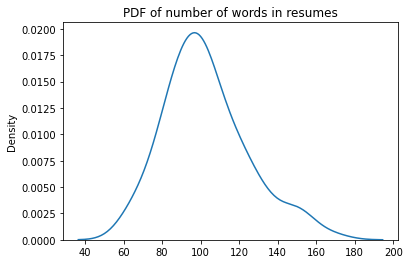

In [33]:
temp = np.array(data_feature['resume_word_num'])
print('Min = '+str(np.min(temp)))
print('Max = '+str(np.max(temp)))
print('Mean = '+str(np.mean(temp)))
sns.kdeplot(temp)
plt.title('PDF of number of words in resumes')
plt.show()

Min = 172
Max = 227
Mean = 194.06666666666666


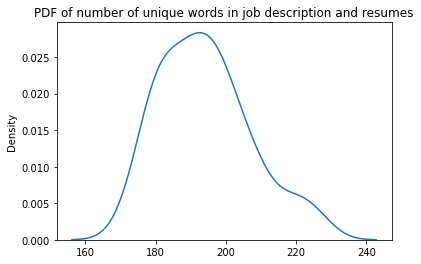

In [34]:
temp = np.array(data_feature['total_unique_word_num'])
print('Min = '+str(np.min(temp)))
print('Max = '+str(np.max(temp)))
print('Mean = '+str(np.mean(temp)))
sns.kdeplot(temp)
plt.title('PDF of number of unique words in job description and resumes')
plt.show()

Min = 9
Max = 36
Mean = 19.711111111111112


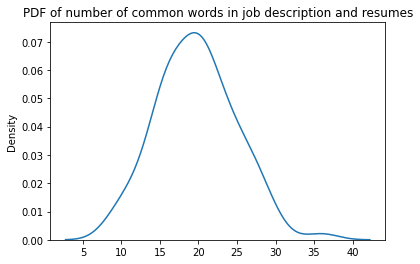

In [35]:
temp = np.array(data_feature['common_word_num'])
print('Min = '+str(np.min(temp)))
print('Max = '+str(np.max(temp)))
print('Mean = '+str(np.mean(temp)))
sns.kdeplot(temp)
plt.title('PDF of number of common words in job description and resumes')
plt.show()

Min = 0.045
Max = 0.1722488038277512
Mean = 0.10148416769605968


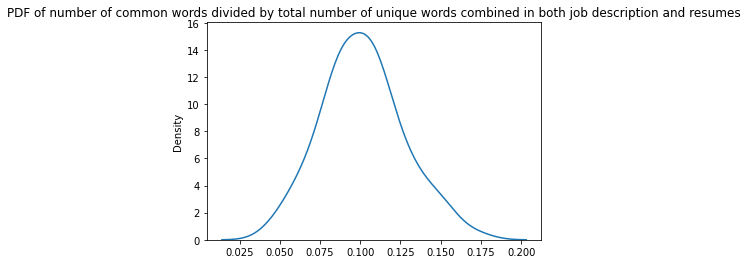

In [36]:
temp = np.array(data_feature['common_word_ratio'])
print('Min = '+str(np.min(temp)))
print('Max = '+str(np.max(temp)))
print('Mean = '+str(np.mean(temp)))
sns.kdeplot(temp)
plt.title('PDF of number of common words divided by total number of unique words combined in both job description and resumes')
plt.show()

Min = 0.11842105263157894
Max = 0.4090909090909091
Mean = 0.24535325502109773


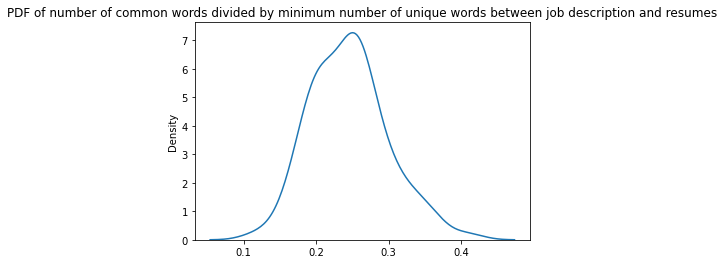

In [37]:
temp = np.array(data_feature['common_word_ratio_min'])
print('Min = '+str(np.min(temp)))
print('Max = '+str(np.max(temp)))
print('Mean = '+str(np.mean(temp)))
sns.kdeplot(temp)
plt.title('PDF of number of common words divided by minimum number of unique words between job description and resumes')
plt.show()

Min = 0.06766917293233082
Max = 0.2706766917293233
Mean = 0.14820384294068506


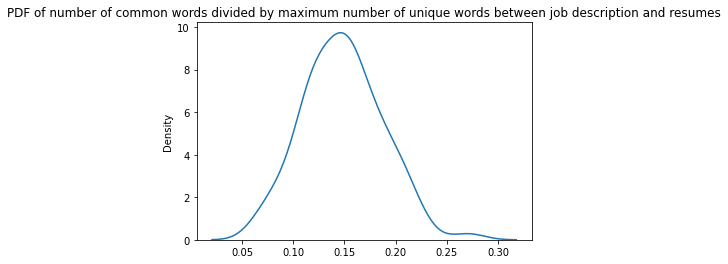

In [38]:
temp = np.array(data_feature['common_word_ratio_max'])
print('Min = '+str(np.min(temp)))
print('Max = '+str(np.max(temp)))
print('Mean = '+str(np.mean(temp)))
sns.kdeplot(temp)
plt.title('PDF of number of common words divided by maximum number of unique words between job description and resumes')
plt.show()

Min = 28
Max = 86
Mean = 68.58888888888889


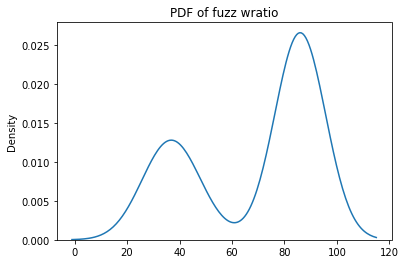

In [39]:
temp = np.array(data_feature['fuzz_ratio'])
print('Min = '+str(np.min(temp)))
print('Max = '+str(np.max(temp)))
print('Mean = '+str(np.mean(temp)))
sns.kdeplot(temp)
plt.title('PDF of fuzz wratio')
plt.show()

Min = 2
Max = 23
Mean = 10.166666666666666


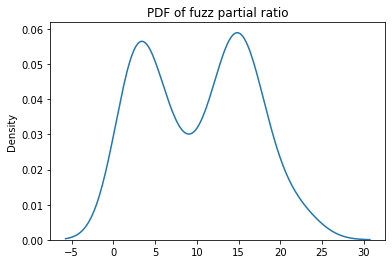

In [40]:
temp = np.array(data_feature['fuzz_partial_ratio'])
print('Min = '+str(np.min(temp)))
print('Max = '+str(np.max(temp)))
print('Mean = '+str(np.mean(temp)))
sns.kdeplot(temp)
plt.title('PDF of fuzz partial ratio')
plt.show()

Min = 24
Max = 60
Mean = 40.24444444444445


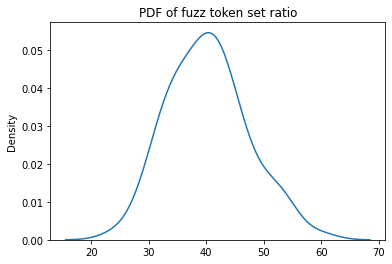

In [41]:
temp = np.array(data_feature['fuzz_token_set_ratio'])
print('Min = '+str(np.min(temp)))
print('Max = '+str(np.max(temp)))
print('Mean = '+str(np.mean(temp)))
sns.kdeplot(temp)
plt.title('PDF of fuzz token set ratio')
plt.show()

Number of freshers 28


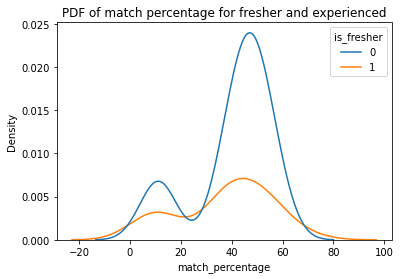

In [42]:
print('Number of freshers',data_feature.is_fresher.sum())
sns.kdeplot(data_feature.match_percentage, hue=data_feature.is_fresher)
plt.title('PDF of match percentage for fresher and experienced')
plt.show()

Number of candidates from reputed colleges 14


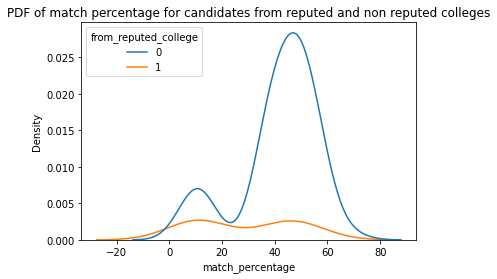

In [43]:
print('Number of candidates from reputed colleges',data_feature.from_reputed_college.sum())
sns.kdeplot(data_feature.match_percentage, hue=data_feature.from_reputed_college)
plt.title('PDF of match percentage for candidates from reputed and non reputed colleges')
plt.show()

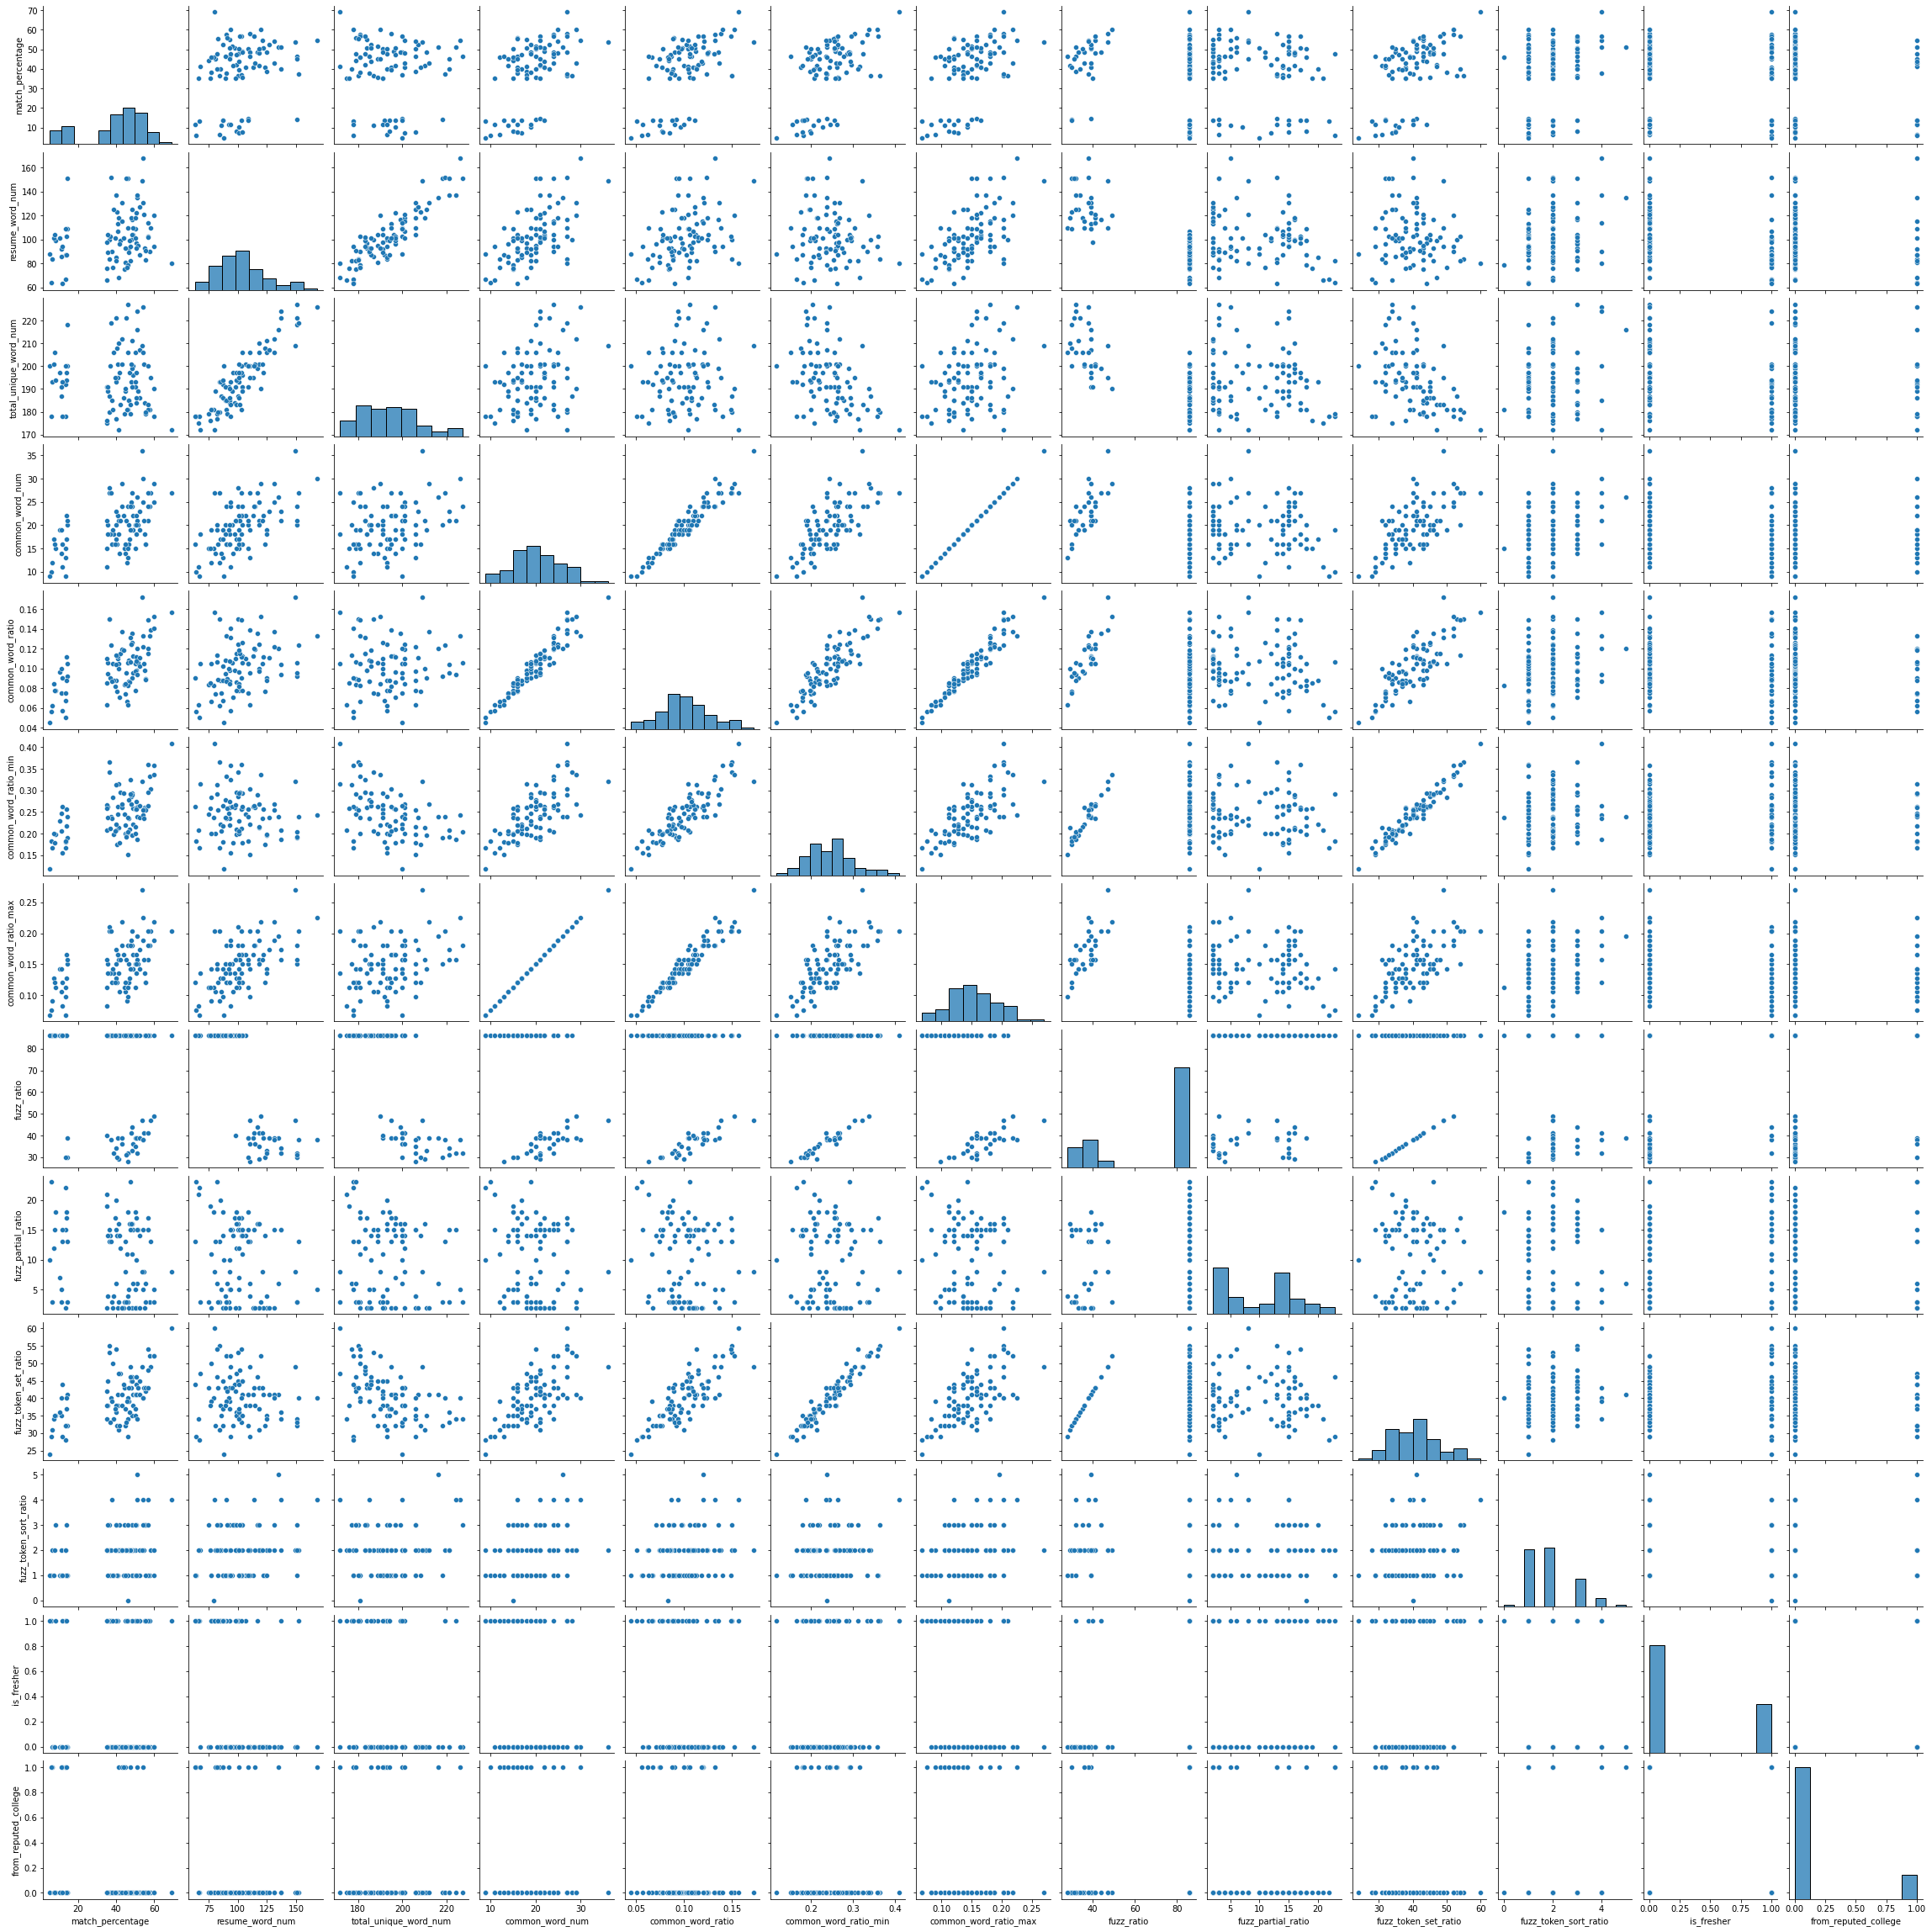

In [44]:
sns.pairplot(data_feature)

In [45]:
common_word_columns = ['common_word_num', 'common_word_ratio', 'common_word_ratio_min', 'common_word_ratio_max']
common_word_columns = ['common_word_num', 'common_word_ratio', 'common_word_ratio_min', 'common_word_ratio_max']
for i in range(len(common_word_columns)):
    for j in range(i+1, len(common_word_columns)):
        print('SRCC between ', common_word_columns[i], ' and ', common_word_columns[j], ' is ', stats.spearmanr(data_feature[common_word_columns[i]],data_feature[common_word_columns[i]]))

SRCC between  common_word_num  and  common_word_ratio  is  SpearmanrResult(correlation=1.0, pvalue=0.0)
SRCC between  common_word_num  and  common_word_ratio_min  is  SpearmanrResult(correlation=1.0, pvalue=0.0)
SRCC between  common_word_num  and  common_word_ratio_max  is  SpearmanrResult(correlation=1.0, pvalue=0.0)
SRCC between  common_word_ratio  and  common_word_ratio_min  is  SpearmanrResult(correlation=1.0, pvalue=0.0)
SRCC between  common_word_ratio  and  common_word_ratio_max  is  SpearmanrResult(correlation=1.0, pvalue=0.0)
SRCC between  common_word_ratio_min  and  common_word_ratio_max  is  SpearmanrResult(correlation=1.0, pvalue=0.0)


Spearman Rank Correlation Coefficient is -0.18034429723542464


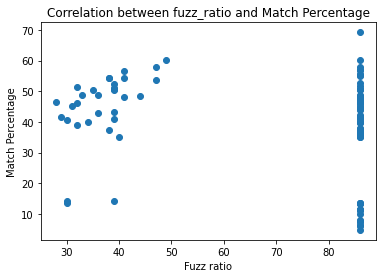

In [46]:
print('Spearman Rank Correlation Coefficient is', stats.spearmanr(data_feature['fuzz_ratio'], data_feature['match_percentage']).correlation)
plt.scatter(data_feature['fuzz_ratio'], data_feature['match_percentage'])
plt.title('Correlation between fuzz_ratio and Match Percentage')
plt.xlabel('Fuzz ratio')
plt.ylabel('Match Percentage')
plt.show()

Spearman Rank Correlation Coefficient is -0.13019460708569053


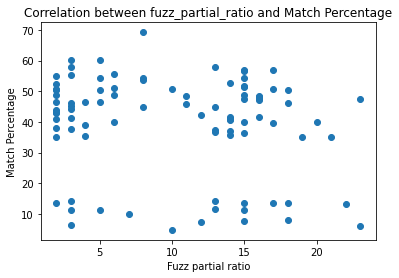

In [47]:
print('Spearman Rank Correlation Coefficient is', stats.spearmanr(data_feature['fuzz_partial_ratio'], data_feature['match_percentage']).correlation)
plt.scatter(data_feature['fuzz_partial_ratio'], data_feature['match_percentage'])
plt.title('Correlation between fuzz_partial_ratio and Match Percentage')
plt.xlabel('Fuzz partial ratio')
plt.ylabel('Match Percentage')
plt.show()

Spearman Rank Correlation Coefficient is 0.5374817469423655


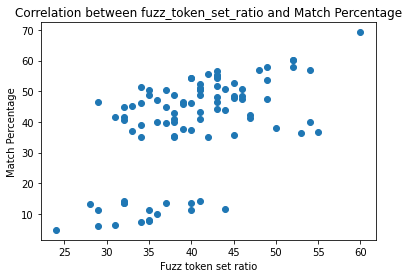

In [48]:
print('Spearman Rank Correlation Coefficient is', stats.spearmanr(data_feature['fuzz_token_set_ratio'], data_feature['match_percentage']).correlation)
plt.scatter(data_feature['fuzz_token_set_ratio'], data_feature['match_percentage'])
plt.title('Correlation between fuzz_token_set_ratio and Match Percentage')
plt.xlabel('Fuzz token set ratio')
plt.ylabel('Match Percentage')
plt.show()

Spearman Rank Correlation Coefficient is 0.2168488466127946


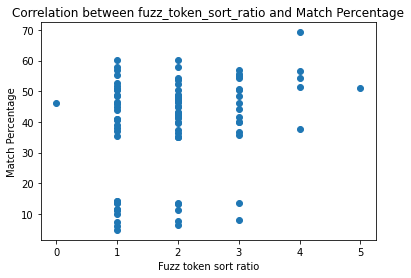

In [49]:
print('Spearman Rank Correlation Coefficient is', stats.spearmanr(data_feature['fuzz_token_sort_ratio'], data_feature['match_percentage']).correlation)
plt.scatter(data_feature['fuzz_token_sort_ratio'], data_feature['match_percentage'])
plt.title('Correlation between fuzz_token_sort_ratio and Match Percentage')
plt.xlabel('Fuzz token sort ratio')
plt.ylabel('Match Percentage')
plt.show()

In [50]:
# remove common_word_ratio and common_word_ratio_max columns
data_feature.drop(columns=['common_word_ratio', 'common_word_ratio_max'], inplace=True)

Feature Encoding

In [51]:
# binary bag of words with unigram, bigram and trigram
# also it has minimum document frequency of 4 and maximum document frequncy of 99%
vectorizer = CountVectorizer(ngram_range=(1,3), min_df=4, max_df=.99, binary=True)

In [52]:
#created text corpus to get the vocabulary
vocab_text = np.unique(np.append(data_feature.processed_resume.values, data_feature.job_description.values))

In [53]:
# fit vocab_text to create the vocabulary
vectorizer.fit(vocab_text)

CountVectorizer(binary=True, max_df=0.99, min_df=4, ngram_range=(1, 3))

In [54]:
# vocabulary size
print(len(vectorizer.vocabulary_))

716


In [55]:
bow_vocab = np.array(list(vectorizer.vocabulary_.keys()))

In [56]:
# save bow_vocab to file
with open('bow_vocab.npy', 'wb') as f:
    np.save(f, bow_vocab, allow_pickle=True)

In [57]:
# transform all resumes to get bow
bow_resume = vectorizer.transform(data_feature.processed_resume.values).toarray()

In [58]:
print(bow_resume.shape)

(90, 716)


In [59]:
# save bow_resume to file
with open('bow_resume.npy', 'wb') as f:
    np.save(f, bow_resume, allow_pickle=True)

In [60]:
# transform all jd to get bow
bow_jd = vectorizer.transform(data_feature.job_description.values).toarray()

In [61]:
print(bow_jd.shape)

(90, 716)


In [62]:
# save bow_jd to file
with open('bow_jd.npy', 'wb') as f:
    np.save(f, bow_jd, allow_pickle=True)

In [63]:
# Get cosine similarity and euclidean distance between two vectors
def cosine_euclidean(u, v):
    return np.array([np.dot(u, v) / (np.linalg.norm(u) * np.linalg.norm(v)), np.linalg.norm(u - v)])

In [64]:
# process all rows to get similarities and distances
cosine_euclidean_data = np.array([cosine_euclidean(bow_jd[i], bow_resume[i]) for i in range(len(bow_resume))])

In [65]:
# add new features to the dataframe
data_feature[["cosine_similarity", "euclidean_distance"]] = cosine_euclidean_data

In [66]:
data_feature.head()

,job_description,processed_resume,match_percentage,resume_word_num,total_unique_word_num,common_word_num,common_word_ratio_min,fuzz_ratio,fuzz_partial_ratio,fuzz_token_set_ratio,fuzz_token_sort_ratio,is_fresher,from_reputed_college,cosine_similarity,euclidean_distance
0,machine learning engineering 13585abc knowledg...,liam andrew fresher executive work experience ...,13.60,87,192,13,0.180556,86,2,32,1,1,1,0.136678,13.416408
1,machine learning engineering 13585abc knowledg...,ellie mackey fresher intern executive profile ...,36.63,84,180,27,0.364865,86,13,55,3,1,0,0.316875,12.328828
2,machine learning engineering 13585abc knowledg...,felix winston fresher fresher knowledge machin...,54.93,93,184,18,0.260870,86,2,43,3,1,0,0.241508,12.845233
3,machine learning engineering 13585abc knowledg...,jimmy gartner da ta manager professional profi...,41.46,118,210,21,0.214286,29,16,31,2,0,0,0.200372,13.564660
4,machine learning engineering 13585abc knowledg...,mason quadrado associate analyst certified dat...,48.91,104,196,22,0.258824,86,15,41,1,0,0,0.266333,12.884099


In [67]:
print(data_feature.shape)

(90, 15)


In [68]:
# save data_feature
data_feature.to_csv('data_feature.csv', index=False)

In [69]:


# create new variable to store new embedding data
data_feature2 = data_feature.drop(columns=['cosine_similarity', 'euclidean_distance'])



In [70]:
!unzip /content/drive/MyDrive/GoogleNewsvectorsnegative300.zip

Archive:  /content/drive/MyDrive/GoogleNewsvectorsnegative300.zip
replace GoogleNewsvectorsnegative300.bin? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [71]:


# load word2vec model
w2v_model = KeyedVectors.load_word2vec_format('/content/GoogleNewsvectorsnegative300.bin', binary=True)



In [72]:
import gensim
print(gensim.__version__)

4.2.0


In [73]:
pip install  --upgrade gensim --pre

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [74]:


# get all available words
w2v_words = list(w2v_model.key_to_index)



In [75]:
def getAverageWord2Vec(sentence):
    ''' get Average Word2Vec given a sentence'''
    # initialize sentence_vector to zeros
    sentence_vector = np.zeros(300)
    # count words in sentence
    count_words = 0
    # loop over each word
    for word in sentence.split():
        # if there is a vector for given word
        if word in w2v_words:
            # get the vector
            vector = w2v_model[word]
            # add the vectors
            sentence_vector = sentence_vector + vector
            # increment count
            count_words = count_words + 1
    if count_words != 0:
        # if the word count is not zero then divide by it to get the average
        sentence_vector /= count_words
    # return the avg word2vec
    return sentence_vector

In [76]:


# get average word2vec for resumes
w2v_resume = []
# used tqdm to print progress bar
for sentence in tqdm(data_feature2.processed_resume.values):
    # get and append sentence vectors
    w2v_resume.append(getAverageWord2Vec(sentence))
# convert to numpy array
w2v_resume = np.array(w2v_resume)



100%|██████████| 90/90 [00:51<00:00,  1.75it/s]


In [77]:


print(w2v_resume.shape)



(90, 300)


In [78]:


# save w2v_resume to file
with open('w2v_resume.npy', 'wb') as f:
    np.save(f, w2v_resume, allow_pickle=True)



In [79]:


# get average word2vec for job description
w2v_jd = []
for sentence in tqdm(data_feature2.job_description.values):
    # get and append sentence vectors
    w2v_jd.append(getAverageWord2Vec(sentence))
# convert to numpy array
w2v_jd = np.array(w2v_jd)



100%|██████████| 90/90 [01:20<00:00,  1.12it/s]


In [80]:


print(w2v_jd.shape)



(90, 300)


In [81]:


# save w2v_jd to file
with open('w2v_jd.npy', 'wb') as f:
    np.save(f, w2v_jd, allow_pickle=True)



In [82]:


# process all rows to get similarities and distances
cosine_euclidean_data = np.array([cosine_euclidean(w2v_jd[i], w2v_resume[i]) for i in range(len(w2v_resume))])



In [83]:


# add new features to the dataframe
data_feature2[["cosine_similarity", "euclidean_distance"]] = cosine_euclidean_data



In [84]:


print(data_feature2.head())



                                     job_description  \
0  machine learning engineering 13585abc knowledg...   
1  machine learning engineering 13585abc knowledg...   
2  machine learning engineering 13585abc knowledg...   
3  machine learning engineering 13585abc knowledg...   
4  machine learning engineering 13585abc knowledg...   

                                    processed_resume  match_percentage  \
0  liam andrew fresher executive work experience ...             13.60   
1  ellie mackey fresher intern executive profile ...             36.63   
2  felix winston fresher fresher knowledge machin...             54.93   
3  jimmy gartner da ta manager professional profi...             41.46   
4  mason quadrado associate analyst certified dat...             48.91   

   resume_word_num  total_unique_word_num  common_word_num  \
0               87                    192               13   
1               84                    180               27   
2               93              

In [85]:


# save data_feature2
data_feature2.to_csv('data_feature2.csv', index=False)



In [86]:


# load data_feature
data_feature = pd.read_csv('data_feature2.csv')



In [87]:


# import required libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse, r2_score, mean_absolute_error as mae
import hyperopt
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
import warnings
from joblib import dump, load
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from prettytable import PrettyTable
from sklearn.preprocessing import MinMaxScaler



In [88]:
# verify data
data_feature.head(2)

,job_description,processed_resume,match_percentage,resume_word_num,total_unique_word_num,common_word_num,common_word_ratio_min,fuzz_ratio,fuzz_partial_ratio,fuzz_token_set_ratio,fuzz_token_sort_ratio,is_fresher,from_reputed_college,cosine_similarity,euclidean_distance
0,machine learning engineering 13585abc knowledg...,liam andrew fresher executive work experience ...,13.60,87,192,13,0.180556,86,2,32,1,1,1,0.896201,0.430370
1,machine learning engineering 13585abc knowledg...,ellie mackey fresher intern executive profile ...,36.63,84,180,27,0.364865,86,13,55,3,1,0,0.900257,0.417824


In [89]:




# load w2v_resume
with open('w2v_resume.npy', 'rb') as f:
    w2v_resume = np.load(f, allow_pickle=True)





In [90]:


# load w2v_jd
with open('w2v_jd.npy', 'rb') as f:
    w2v_jd = np.load(f, allow_pickle=True)



In [91]:


# create output variable
y_w2v = data_feature.match_percentage



In [92]:


# create input variables from extracted features
X_w2v_1 = data_feature.drop(columns=['job_description', 'processed_resume', 'match_percentage'])



In [93]:


X_w2v_1.head(3)



,resume_word_num,total_unique_word_num,common_word_num,common_word_ratio_min,fuzz_ratio,fuzz_partial_ratio,fuzz_token_set_ratio,fuzz_token_sort_ratio,is_fresher,from_reputed_college,cosine_similarity,euclidean_distance
0,87,192,13,0.180556,86,2,32,1,1,1,0.896201,0.430370
1,84,180,27,0.364865,86,13,55,3,1,0,0.900257,0.417824
2,93,184,18,0.260870,86,2,43,3,1,0,0.890447,0.443868


In [94]:


# create input variables from bow of job description
X_w2v_2 = pd.DataFrame(w2v_jd, columns=['w2v_jd_'+str(i) for i in range(1, w2v_jd.shape[1]+1)])



In [95]:


X_w2v_2.head(3)



,w2v_jd_1,w2v_jd_2,w2v_jd_3,w2v_jd_4,w2v_jd_5,w2v_jd_6,w2v_jd_7,w2v_jd_8,w2v_jd_9,w2v_jd_10,...,w2v_jd_291,w2v_jd_292,w2v_jd_293,w2v_jd_294,w2v_jd_295,w2v_jd_296,w2v_jd_297,w2v_jd_298,w2v_jd_299,w2v_jd_300
0,0.006335,0.015374,0.018297,0.079522,-0.043794,0.038008,0.057309,-0.096545,0.061698,0.032799,...,-0.123924,0.051403,-0.083477,0.014774,-0.022493,0.004105,0.037251,-0.031369,-0.014646,0.023314
1,0.006335,0.015374,0.018297,0.079522,-0.043794,0.038008,0.057309,-0.096545,0.061698,0.032799,...,-0.123924,0.051403,-0.083477,0.014774,-0.022493,0.004105,0.037251,-0.031369,-0.014646,0.023314
2,0.006335,0.015374,0.018297,0.079522,-0.043794,0.038008,0.057309,-0.096545,0.061698,0.032799,...,-0.123924,0.051403,-0.083477,0.014774,-0.022493,0.004105,0.037251,-0.031369,-0.014646,0.023314


In [96]:


# create input variables from bow of resumes
X_w2v_3 = pd.DataFrame(w2v_resume, columns=['w2v_resume_'+str(i) for i in range(1, w2v_resume.shape[1]+1)])



In [97]:


X_w2v_3.head(3)



,w2v_resume_1,w2v_resume_2,w2v_resume_3,w2v_resume_4,w2v_resume_5,w2v_resume_6,w2v_resume_7,w2v_resume_8,w2v_resume_9,w2v_resume_10,...,w2v_resume_291,w2v_resume_292,w2v_resume_293,w2v_resume_294,w2v_resume_295,w2v_resume_296,w2v_resume_297,w2v_resume_298,w2v_resume_299,w2v_resume_300
0,0.006755,-0.012968,0.000473,0.071339,-0.044992,0.038680,0.015418,-0.091917,0.044148,0.022059,...,-0.093632,0.078467,-0.082520,0.043662,-0.071912,-0.024356,0.025531,-0.037547,-0.004469,0.020108
1,0.013918,0.009207,-0.007583,0.055042,-0.037466,0.039507,0.052094,-0.067925,0.014280,0.003542,...,-0.123900,0.046592,-0.104040,-0.003736,-0.028183,-0.040095,0.053966,-0.031487,-0.012002,0.038397
2,-0.036020,0.019367,0.021208,0.048960,-0.024904,0.051158,0.046907,-0.063099,0.029806,-0.010489,...,-0.113115,0.018916,-0.068564,0.032169,-0.051364,-0.022383,0.029400,-0.058286,0.013220,0.029417


In [98]:
# concat all three to create the original input
X_w2v = pd.concat([X_w2v_1, X_w2v_2, X_w2v_3], axis=1)

In [99]:


print(X_w2v.shape)



(90, 612)


In [100]:


X_w2v.head(3)



,resume_word_num,total_unique_word_num,common_word_num,common_word_ratio_min,fuzz_ratio,fuzz_partial_ratio,fuzz_token_set_ratio,fuzz_token_sort_ratio,is_fresher,from_reputed_college,...,w2v_resume_291,w2v_resume_292,w2v_resume_293,w2v_resume_294,w2v_resume_295,w2v_resume_296,w2v_resume_297,w2v_resume_298,w2v_resume_299,w2v_resume_300
0,87,192,13,0.180556,86,2,32,1,1,1,...,-0.093632,0.078467,-0.082520,0.043662,-0.071912,-0.024356,0.025531,-0.037547,-0.004469,0.020108
1,84,180,27,0.364865,86,13,55,3,1,0,...,-0.123900,0.046592,-0.104040,-0.003736,-0.028183,-0.040095,0.053966,-0.031487,-0.012002,0.038397
2,93,184,18,0.260870,86,2,43,3,1,0,...,-0.113115,0.018916,-0.068564,0.032169,-0.051364,-0.022383,0.029400,-0.058286,0.013220,0.029417


In [101]:


y_w2v = y_w2v.to_numpy()
X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v = train_test_split(X_w2v, y_w2v, test_size=0.30, random_state=1)



In [102]:


# get train and test indices
train_indices = X_train_w2v.index
test_indices = X_test_w2v.index



In [103]:
# mean centering, variance scaling
scaler = StandardScaler()

In [104]:


# getting mean and variance
scaler.fit(X_train_w2v)



StandardScaler()

In [105]:


# standardizing train data
X_train_w2v = scaler.transform(X_train_w2v)



In [106]:


# standardizing test data
X_test_w2v = scaler.transform(X_test_w2v)



In [107]:
def objective(space):
    '''objective function for hyper param tuning'''
    # 3 fold cross validation
    kf = KFold(n_splits=3)
    mselosses = []
    # k fold cross validation
    for train_index, cv_index in kf.split(X_train_w2v):
        # split input data
        X_train, X_cv = X_train_w2v[train_index], X_train_w2v[cv_index]
        # split output data
        y_train, y_cv = y_train_w2v[train_index], y_train_w2v[cv_index]
        # create Linear Regression model with l2 regularizer
        model = Ridge(alpha = space['alpha'], max_iter=3000)
        # train the model
        model.fit(X_train, y_train)
        cv_pred = model.predict(X_cv)
        tempmseloss = mse(y_cv, cv_pred)
        mselosses.append(tempmseloss)
        
    # calculate mse
    mseloss = sum(mselosses)/len(mselosses)
    # return params
    return {'loss':mseloss, 'status': STATUS_OK, 'params': space }


In [108]:


# search space for hyper parameter tuning
space = {
    # uniform distribution between 0.001 and 1000
    "alpha": hp.quniform("alpha", 0.001, 1000, 0.001)
}



In [109]:
# create trials
trials = Trials()
# minimise the objective function with max 300 trials
best_param = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=300,
            trials=trials)

100%|██████████| 300/300 [00:04<00:00, 63.76it/s, best loss: 152.25881942590456]


In [110]:


print("Best Param : ", best_param)



Best Param :  {'alpha': 71.769}


In [111]:
# create l2 linear regerssion model
lr_model_t = Ridge(alpha = 88.674, max_iter=3000)
# fit model on train data
lr_model_t.fit(X_train_w2v, y_train_w2v)

Ridge(alpha=88.674, max_iter=3000)

In [112]:
def showErrors(model, X_train, y_train, X_test, y_test):
    '''show errors for train and test and also return test errors'''
    print('\n','==========','Train Errors','==========','\n')
    # predict for train
    y_train_pred = model.predict(X_train)
    # get mean squared error for train data
    print('MSE on train data =>',mse(y_train, y_train_pred))
    # get r squared score for train data
    print('R-squared on train data =>',r2_score(y_train, y_train_pred))
    # plot histogram 
    sns.histplot(y_train - y_train_pred)
    # set title and show plot
    plt.title('PDF of errors')
    plt.show()

    print('\n','==========','Test Errors','==========','\n')
    # predict for test
    y_test_pred = model.predict(X_test)
    # get mean squared error for test data
    print('MSE on test data =>',mse(y_test, y_test_pred))
    # get r squared score for test data
    print('R-squared on test data =>',r2_score(y_test, y_test_pred))
    # get errors
    test_errors = y_test - y_test_pred
    # plot histogram 
    sns.histplot(test_errors)
    # set title and show plot
    plt.title('PDF of errors')
    plt.show()
    return test_errors


 ========== Train Errors ========== 

MSE on train data => 16.30816610981417
R-squared on train data => 0.937806512476482


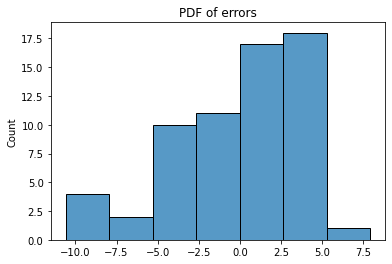


 ========== Test Errors ========== 

MSE on test data => 113.3365309922916
R-squared on test data => 0.5183969175011585


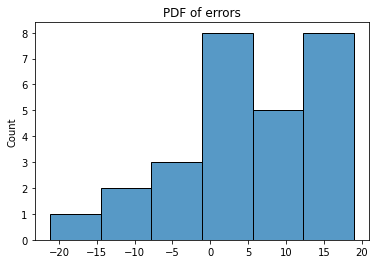

In [113]:


test_errors = showErrors(lr_model_t, X_train_w2v, y_train_w2v, X_test_w2v, y_test_w2v)



In [114]:
def objective(space):
    '''objective function for hyper param tuning'''
    # 3 fold cross validation
    kf = KFold(n_splits=3)
    mselosses = []
    # k fold cross validation
    for train_index, cv_index in kf.split(X_train_w2v):
        # split input data
        X_train, X_cv = X_train_w2v[train_index], X_train_w2v[cv_index]
        # split output data
        y_train, y_cv = y_train_w2v[train_index], y_train_w2v[cv_index]
        # create KNeighborsRegressor
        model = KNeighborsRegressor(n_neighbors=space['n_neighbors'], metric=space['metric'])
        # train the model
        model.fit(X_train, y_train)
        cv_pred = model.predict(X_cv)
        tempmseloss = mse(y_cv, cv_pred)
        mselosses.append(tempmseloss)
        
    # calculate mse
    mseloss = sum(mselosses)/len(mselosses)
    # return params
    return {'loss':mseloss, 'status': STATUS_OK, 'params': space }

In [115]:
# search space for hyper parameter tuning
space = {
    "n_neighbors": hp.choice("n_neighbors", [3, 5, 7]),
    "metric": hp.choice("metric", ['euclidean', 'cosine'])
}

In [116]:
# create trials
trials = Trials()
# minimise the objective function with max 300 trials
best_param = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=300,
            trials=trials)

100%|██████████| 300/300 [00:02<00:00, 110.93it/s, best loss: 239.26088720440555]


In [117]:


print(best_param)



{'metric': 1, 'n_neighbors': 2}


In [118]:


knn_model = KNeighborsRegressor(n_neighbors=7, metric='cosine')



In [119]:


knn_model.fit(X_train_w2v, y_train_w2v)



KNeighborsRegressor(metric='cosine', n_neighbors=7)


 ========== Train Errors ========== 

MSE on train data => 154.76790994493035
R-squared on train data => 0.4097707852994962


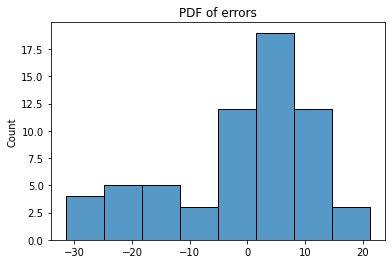


 ========== Test Errors ========== 

MSE on test data => 110.16032804232808
R-squared on test data => 0.5318936172673476


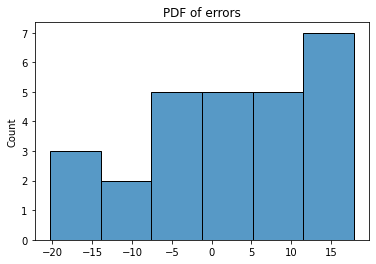

In [120]:


test_errors = showErrors(knn_model, X_train_w2v, y_train_w2v, X_test_w2v, y_test_w2v)

In [121]:
def objective(space):
    '''objective function for hyper param tuning'''
    # 3 fold cross validation
    kf = KFold(n_splits=3)
    mselosses = []
    # k fold cross validation
    for train_index, cv_index in kf.split(X_train_w2v):
        # split input data
        X_train, X_cv = X_train_w2v[train_index], X_train_w2v[cv_index]
        # split output data
        y_train, y_cv = y_train_w2v[train_index], y_train_w2v[cv_index]
        # create Linear Regression model with l2 regularizer
        model = Ridge(alpha = space['alpha'], max_iter=3000)
        # train the model
        model.fit(X_train, y_train)
        cv_pred = model.predict(X_cv)
        tempmseloss = mse(y_cv, cv_pred)
        mselosses.append(tempmseloss)
        
    # calculate mse
    mseloss = sum(mselosses)/len(mselosses)
    # return params
    return {'loss':mseloss, 'status': STATUS_OK, 'params': space }

In [122]:


# search space for hyper parameter tuning
space = {
    # uniform distribution between 0.001 and 1000
    "alpha": hp.quniform("alpha", 0.001, 1000, 0.001)
}



In [123]:


# create trials
trials = Trials()
# minimise the objective function with max 300 trials
best_param = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=300,
            trials=trials)



100%|██████████| 300/300 [00:04<00:00, 62.94it/s, best loss: 152.25900477154656]


In [124]:


print("Best Param : ", best_param)



Best Param :  {'alpha': 71.2}


In [125]:


# create l2 linear regerssion model
lr_model_2 = Ridge(alpha = 8.287, max_iter=3000)
# fit model on train data
lr_model_2.fit(X_train_w2v, y_train_w2v)



Ridge(alpha=8.287, max_iter=3000)


 ========== Train Errors ========== 

MSE on train data => 0.5386539938820041
R-squared on train data => 0.9979457671560119


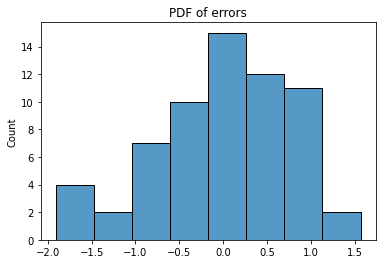


 ========== Test Errors ========== 

MSE on test data => 150.50339885750674
R-squared on test data => 0.36046303710091787


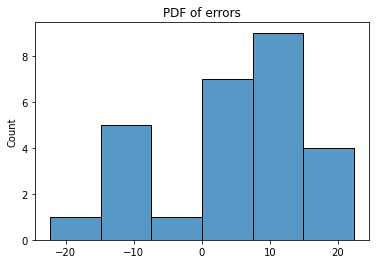

In [126]:
test_errors = showErrors(lr_model_2, X_train_w2v, y_train_w2v, X_test_w2v, y_test_w2v)

In [127]:


def objective(space):
    '''objective function for hyper param tuning'''
    # 3 fold cross validation
    kf = KFold(n_splits=3)
    mselosses = []
    # k fold cross validation
    for train_index, cv_index in kf.split(X_train_w2v):
        # split input data
        X_train, X_cv = X_train_w2v[train_index], X_train_w2v[cv_index]
        # split output data
        y_train, y_cv = y_train_w2v[train_index], y_train_w2v[cv_index]
        # create Linear Regression model with l2 regularizer
        model = KNeighborsRegressor(n_neighbors=space['n_neighbors'], metric=space['metric'])
        # train the model
        model.fit(X_train, y_train)
        cv_pred = model.predict(X_cv)
        tempmseloss = mse(y_cv, cv_pred)
        mselosses.append(tempmseloss)
        
    # calculate mse
    mseloss = sum(mselosses)/len(mselosses)
    # return params
    return {'loss':mseloss, 'status': STATUS_OK, 'params': space }



In [128]:
# search space for hyper parameter tuning
space = {
    "n_neighbors": hp.choice("n_neighbors", [3, 5, 7]),
    "metric": hp.choice("metric", ['euclidean', 'cosine'])
}

In [129]:
# create trials
trials = Trials()
# minimise the objective function with max 300 trials
best_param = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=300,
            trials=trials)

100%|██████████| 300/300 [00:02<00:00, 109.26it/s, best loss: 239.26088720440555]


In [130]:
print(best_param)

{'metric': 1, 'n_neighbors': 2}


In [131]:


knn_model_2 = KNeighborsRegressor(n_neighbors=7, metric='cosine')



In [132]:


knn_model_2.fit(X_train_w2v, y_train_w2v)



KNeighborsRegressor(metric='cosine', n_neighbors=7)


 ========== Train Errors ========== 

MSE on train data => 154.76790994493035
R-squared on train data => 0.4097707852994962


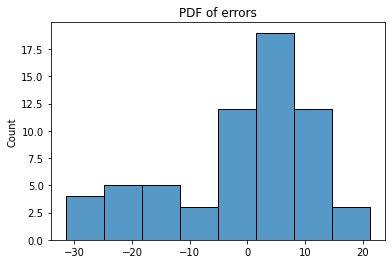


 ========== Test Errors ========== 

MSE on test data => 110.16032804232808
R-squared on test data => 0.5318936172673476


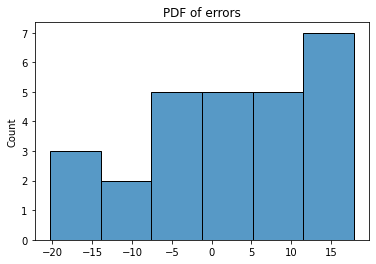

In [133]:


test_errors = showErrors(knn_model_2, X_train_w2v, y_train_w2v, X_test_w2v, y_test_w2v)



In [134]:


def objective(space):
    '''objective function for hyper param tuning'''
    # 3 fold cross validation
    kf = KFold(n_splits=3)
    mselosses = []
    # k fold cross validation
    for train_index, cv_index in kf.split(X_train_w2v):
        # split input data
        X_train, X_cv = X_train_w2v[train_index], X_train_w2v[cv_index]
        # split output data
        y_train, y_cv = y_train_w2v[train_index], y_train_w2v[cv_index]
        # create DecisionTreeRegressor
        model = DecisionTreeRegressor(max_depth=space['max_depth'], min_samples_split=space['min_samples_split'])
        # train the model
        model.fit(X_train, y_train)
        cv_pred = model.predict(X_cv)
        tempmseloss = mse(y_cv, cv_pred)
        mselosses.append(tempmseloss)
        
    # calculate mse
    mseloss = sum(mselosses)/len(mselosses)
    # return params
    return {'loss':mseloss, 'status': STATUS_OK, 'params': space }



In [135]:
# search space for hyper parameter tuning
space = {
    "max_depth": hp.choice("max_depth", [5, 7, 10, 15, 20, None]),
    "min_samples_split": hp.choice("min_samples_split", [2, 3, 5, 7])
}

In [136]:


# create trials
trials = Trials()
# minimise the objective function with max 300 trials
best_param = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=300,
            trials=trials)



100%|██████████| 300/300 [00:04<00:00, 66.10it/s, best loss: 239.43609064924385]


In [137]:


best_param



{'max_depth': 0, 'min_samples_split': 2}

In [138]:


dt_model_2 = DecisionTreeRegressor(max_depth=10, min_samples_split=5)



In [139]:


dt_model_2.fit(X_train_w2v, y_train_w2v)



DecisionTreeRegressor(max_depth=10, min_samples_split=5)


 ========== Train Errors ========== 

MSE on train data => 0.931533068783069
R-squared on train data => 0.9964474674895395


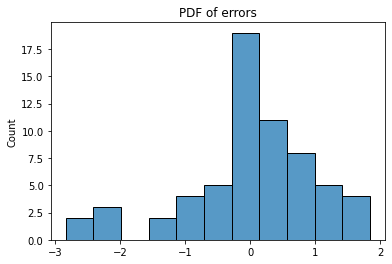


 ========== Test Errors ========== 

MSE on test data => 325.5203082561728
R-squared on test data => -0.38323965361890666


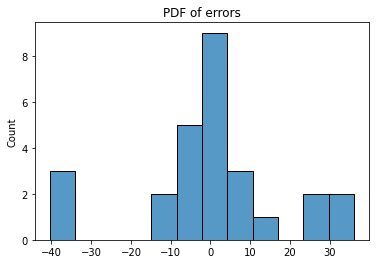

In [140]:


test_errors = showErrors(dt_model_2, X_train_w2v, y_train_w2v, X_test_w2v, y_test_w2v)




 ========== Train Errors ========== 

MSE on train data => 0.931533068783069
R-squared on train data => 0.9964474674895395


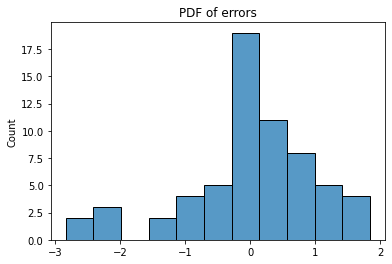


 ========== Test Errors ========== 

MSE on test data => 325.5203082561728
R-squared on test data => -0.38323965361890666


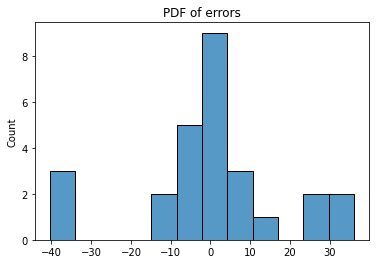

In [141]:


test_errors = showErrors(dt_model_2, X_train_w2v, y_train_w2v, X_test_w2v, y_test_w2v)



In [142]:
def objective(space):
    '''objective function for hyper param tuning'''
    # 3 fold cross validation
    kf = KFold(n_splits=3)
    mselosses = []
    # k fold cross validation
    for train_index, cv_index in kf.split(X_train_w2v):
        # split input data
        X_train, X_cv = X_train_w2v[train_index], X_train_w2v[cv_index]
        # split output data
        y_train, y_cv = y_train_w2v[train_index], y_train_w2v[cv_index]
        # create SVR RBF
        model = SVR(C = space['c'])
        # train the model
        model.fit(X_train, y_train)
        cv_pred = model.predict(X_cv)
        tempmseloss = mse(y_cv, cv_pred)
        mselosses.append(tempmseloss)
        
    # calculate mse
    mseloss = sum(mselosses)/len(mselosses)
    # return params
    return {'loss':mseloss, 'status': STATUS_OK, 'params': space }

In [143]:


# search space for hyper parameter tuning
space = {
    # uniform distribution between 0.001 and 1000
    "c": hp.quniform("c", 0.001, 1000, 0.001)
}



In [144]:


# create trials
trials = Trials()
# minimise the objective function with max 300 trials
best_param = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=300,
            trials=trials)



100%|██████████| 300/300 [00:03<00:00, 84.04it/s, best loss: 203.56262702058018]


In [145]:
print("Best Param : ", best_param)

Best Param :  {'c': 464.214}


In [146]:


svr_model_rbf_2 = SVR(C = 399.718)



In [147]:
svr_model_rbf_2.fit(X_train_w2v, y_train_w2v)

SVR(C=399.718)


 ========== Train Errors ========== 

MSE on train data => 0.01000542647538103
R-squared on train data => 0.9999618428974494


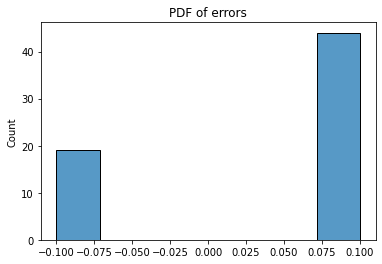


 ========== Test Errors ========== 

MSE on test data => 113.41151025186602
R-squared on test data => 0.5180783067035775


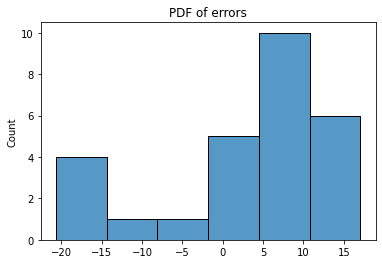

In [148]:


test_errors = showErrors(svr_model_rbf_2, X_train_w2v, y_train_w2v, X_test_w2v, y_test_w2v)



In [149]:
def objective(space):
    '''objective function for hyper param tuning'''
    # 3 fold cross validation
    kf = KFold(n_splits=3)
    mselosses = []
    # k fold cross validation
    for train_index, cv_index in kf.split(X_train_w2v):
        # split input data
        X_train, X_cv = X_train_w2v[train_index], X_train_w2v[cv_index]
        # split output data
        y_train, y_cv = y_train_w2v[train_index], y_train_w2v[cv_index]
        # create SVR Linear
        model = SVR(kernel = 'linear', C = space['c'])
        # train the model
        model.fit(X_train, y_train)
        cv_pred = model.predict(X_cv)
        tempmseloss = mse(y_cv, cv_pred)
        mselosses.append(tempmseloss)
        
    # calculate mse
    mseloss = sum(mselosses)/len(mselosses)
    # return params
    return {'loss':mseloss, 'status': STATUS_OK, 'params': space }

In [150]:
# search space for hyper parameter tuning
space = {
    # uniform distribution between 0.001 and 1000
    "c": hp.quniform("c", 0.001, 1000, 0.001)
}

In [151]:


# create trials
trials = Trials()
# minimise the objective function with max 300 trials
best_param = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=300,
            trials=trials)



100%|██████████| 300/300 [00:03<00:00, 88.75it/s, best loss: 162.61876154893773]


In [152]:


print("Best Param : ", best_param)



Best Param :  {'c': 153.623}


In [153]:


print("Best Param : ", best_param)



Best Param :  {'c': 153.623}


In [154]:


svr_model_rbf_2 = SVR(C = 399.718)



In [155]:



svr_model_rbf_2.fit(X_train_w2v, y_train_w2v)





SVR(C=399.718)


 ========== Train Errors ========== 

MSE on train data => 0.01000542647538103
R-squared on train data => 0.9999618428974494


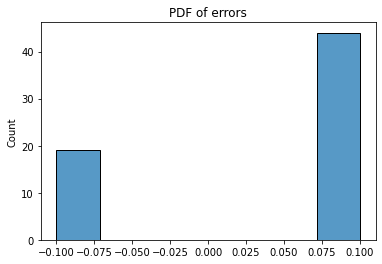


 ========== Test Errors ========== 

MSE on test data => 113.41151025186602
R-squared on test data => 0.5180783067035775


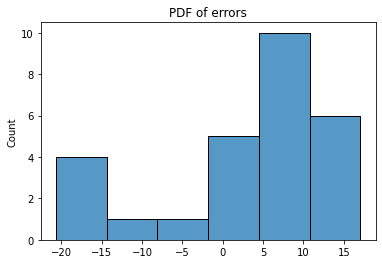

In [156]:




test_errors = showErrors(svr_model_rbf_2, X_train_w2v, y_train_w2v, X_test_w2v, y_test_w2v)





In [157]:
def objective(space):
    '''objective function for hyper param tuning'''
    # 3 fold cross validation
    kf = KFold(n_splits=3)
    mselosses = []
    # k fold cross validation
    for train_index, cv_index in kf.split(X_train_w2v):
        # split input data
        X_train, X_cv = X_train_w2v[train_index], X_train_w2v[cv_index]
        # split output data
        y_train, y_cv = y_train_w2v[train_index], y_train_w2v[cv_index]
        # create SVR Linear
        model = SVR(kernel = 'linear', C = space['c'])
        # train the model
        model.fit(X_train, y_train)
        cv_pred = model.predict(X_cv)
        tempmseloss = mse(y_cv, cv_pred)
        mselosses.append(tempmseloss)
        
    # calculate mse
    mseloss = sum(mselosses)/len(mselosses)
    # return params
    return {'loss':mseloss, 'status': STATUS_OK, 'params': space }

In [158]:


# search space for hyper parameter tuning
space = {
    # uniform distribution between 0.001 and 1000
    "c": hp.quniform("c", 0.001, 1000, 0.001)
}



In [159]:


# create trials
trials = Trials()
# minimise the objective function with max 300 trials
best_param = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=300,
            trials=trials)





100%|██████████| 300/300 [00:04<00:00, 71.04it/s, best loss: 162.61876154893773]


In [160]:




print("Best Param : ", best_param)





Best Param :  {'c': 654.6270000000001}


In [161]:




svr_model_linear_2 = SVR(kernel = 'linear', C = 385.101)





In [162]:




svr_model_linear_2.fit(X_train_w2v, y_train_w2v)





SVR(C=385.101, kernel='linear')


 ========== Train Errors ========== 

MSE on train data => 0.01001874482783836
R-squared on train data => 0.9999617921060372


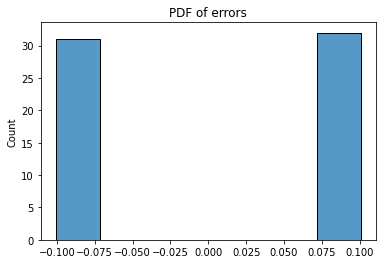


 ========== Test Errors ========== 

MSE on test data => 159.45892513463525
R-squared on test data => 0.3224081485076027


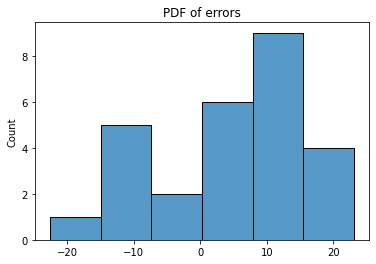

In [163]:



test_errors = showErrors(svr_model_linear_2, X_train_w2v, y_train_w2v, X_test_w2v, y_test_w2v)





In [164]:


def objective(space):
    '''objective function for hyper param tuning'''
    # 3 fold cross validation
    kf = KFold(n_splits=3)
    mselosses = []
    # k fold cross validation
    for train_index, cv_index in kf.split(X_train_w2v):
        # split input data
        X_train, X_cv = X_train_w2v[train_index], X_train_w2v[cv_index]
        # split output data
        y_train, y_cv = y_train_w2v[train_index], y_train_w2v[cv_index]
        # create RandomForestRegressor
        model = RandomForestRegressor(n_estimators = space['n_estimators'], 
                                      min_samples_split = space['min_samples_split'], 
                                      max_depth = space['max_depth'])
        # train the model
        model.fit(X_train, y_train)
        cv_pred = model.predict(X_cv)
        tempmseloss = mse(y_cv, cv_pred)
        mselosses.append(tempmseloss)
        
    # calculate mse
    mseloss = sum(mselosses)/len(mselosses)
    # return params
    return {'loss':mseloss, 'status': STATUS_OK, 'params': space }



In [165]:


# search space for hyper parameter tuning
space = {
    "n_estimators": hp.choice("n_estimators", [50, 70, 100, 150]),
    "min_samples_split": hp.choice("min_samples_split", [2, 3, 5]),
    "max_depth": hp.choice("max_depth", [10, 15, 20])
}



In [166]:


# create trials
trials = Trials()
# minimise the objective function with max 300 trials
best_param = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=300,
            trials=trials)



100%|██████████| 300/300 [03:10<00:00,  1.58it/s, best loss: 169.95230812277296]


In [167]:


print("Best Param : ", best_param)




Best Param :  {'max_depth': 2, 'min_samples_split': 0, 'n_estimators': 1}


In [168]:


rf_model_2 = RandomForestRegressor(n_estimators = 50, min_samples_split = 5, max_depth = 20)



In [169]:



rf_model_2.fit(X_train_w2v, y_train_w2v)




RandomForestRegressor(max_depth=20, min_samples_split=5, n_estimators=50)


 ========== Train Errors ========== 

MSE on train data => 27.20822100321243
R-squared on train data => 0.8962376184970258


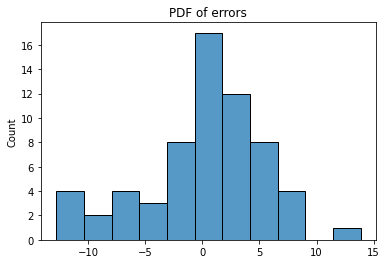


 ========== Test Errors ========== 

MSE on test data => 111.75996174902156
R-squared on test data => 0.5250962632521181


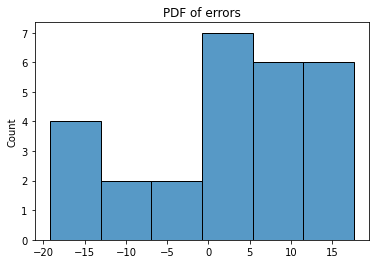

In [170]:



test_errors = showErrors(rf_model_2, X_train_w2v, y_train_w2v, X_test_w2v, y_test_w2v)



In [171]:
def objective(space):
    '''objective function for hyper param tuning'''
    # 3 fold cross validation
    kf = KFold(n_splits=3)
    mselosses = []
    # k fold cross validation
    for train_index, cv_index in kf.split(X_train_w2v):
        # split input data
        X_train, X_cv = X_train_w2v[train_index], X_train_w2v[cv_index]
        # split output data
        y_train, y_cv = y_train_w2v[train_index], y_train_w2v[cv_index]
        # create XGBoost Regressor
        model = xgb.XGBRegressor(
                    objective = "reg:squarederror",
                    # eval_metric = "mse",
                    booster = "gbtree",
                    tree_method = "hist",
                    grow_policy = "lossguide",
                    subsample = .8,
                    colsample_bytree = .5,
                    n_estimators = space['n_estimators'], 
                    max_depth = space['max_depth'],
                    learning_rate = space['learning_rate'],
                    reg_lambda = space['reg_lambda'],
                )
        # train the model
        model.fit(X_train, y_train)
        cv_pred = model.predict(X_cv)
        tempmseloss = mse(y_cv, cv_pred)
        mselosses.append(tempmseloss)
        
    # calculate mse
    mseloss = sum(mselosses)/len(mselosses)
    # return params
    return {'loss':mseloss, 'status': STATUS_OK, 'params': space }

In [172]:


# search space for hyper parameter tuning
space = {
    'n_estimators' : hp.choice('n_estimators', [50, 70, 100, 150]),
    'max_depth' : hp.choice('max_depth', [2, 3, 5, 7]),
    "learning_rate": hp.quniform("learning_rate", 0.01, 1, 0.01),
    "reg_lambda": hp.quniform("reg_lambda", 0.001, 1000, 0.001)
}



In [173]:


# create trials
trials = Trials()
# minimise the objective function with max 300 trials
best_param = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=300,
            trials=trials)



100%|██████████| 300/300 [01:42<00:00,  2.94it/s, best loss: 174.50369718947218]


In [174]:
print("Best Param : ", best_param)

Best Param :  {'learning_rate': 0.3, 'max_depth': 0, 'n_estimators': 1, 'reg_lambda': 0.266}


In [175]:
xgb_model = xgb.XGBRegressor(
                    objective = "reg:squarederror",
                    booster = "gbtree",
                    tree_method = "hist",
                    grow_policy = "lossguide",
                    subsample = .8,
                    colsample_bytree = .5,
                    n_estimators = 100, 
                    max_depth = 2,
                    learning_rate = 0.04,
                    reg_lambda = 0.22
                )

In [176]:


xgb_model.fit(X_train_w2v, y_train_w2v)



XGBRegressor(colsample_bytree=0.5, grow_policy='lossguide', learning_rate=0.04,
             max_depth=2, objective='reg:squarederror', reg_lambda=0.22,
             subsample=0.8, tree_method='hist')


 ========== Train Errors ========== 

MSE on train data => 7.654882927275696
R-squared on train data => 0.9708070262084829


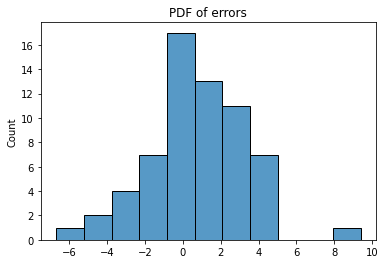


 ========== Test Errors ========== 

MSE on test data => 83.16388285221045
R-squared on test data => 0.6466101266420341


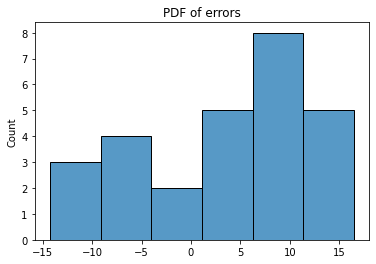

In [177]:


test_errors = showErrors(xgb_model, X_train_w2v, y_train_w2v, X_test_w2v, y_test_w2v)

